# Partitions and Summary Statistics

In this chapter, we will use a relatively simple approach to assessing whether a particular socioeconomic factor is associated with different numbers of Covid-19 cases. We will use the values of that socioeconomic factor to *partition* the Covid case data into two groups. Below, we provide some definitions to clarify exactly what we mean by a partition. We start by introducing the concept of *disjoint* collections of data:

````{panels}
DEFINITION
^^^
disjoint
: collections of data are disjoint if no data point belongs to more than one of the collections
````

If the data points are unique, then we can use the mathematics of sets to formalize these ideas.  If you are unfamiliar with sets and their operations, please review **Appendix A** for a brief introduction. For our purposes, we can always consider a collection of data points to be unique if we include a unique index value with each data point.

A collection of sets $A_0, A_1, \ldots, A_{n-1}$ are disjoint if $A_i \cap A_j =\emptyset$ for every $i \in \{0,1,\ldots, n-1\}$, $j \in \{0,1,\ldots, n-1\}$, where $i \ne j$. 



<!--
MOVE THIS TO APPENDIX A

````{panels}
DEFINITION
^^^
set
: a set is an unordered collection of unique items
````

Note that sets can contain any type of item, such as number, labels, names, types of dogs, weather conditions, etc.
-->





````{panels}
DEFINITION
^^^
partition
: a partition of a data set is a group of **disjoint** collections of data, such that every data point in the original data set belongs to exactly one of the collections. 
````

If $S$ is a set of data, then the collections $A_0, A_1, \ldots A_{n-1}$ partition $S$ if:
$$
\bigcup_{i=0}^{n-1} A_i = S
$$
and $A_0, A_1, \ldots, A_{n-1}$ are  disjoint.






A *binary partition* of a set $S$ is a pair of sets $A_0$ and $A_1$ such that $A_0 \cup A_1 =S$ and $A_0 \cap A_1 = \emptyset$.

To use a particular socioeconomic metric to partition our data, we will partition the data into two sets: one with higher values of that metric, and one with lower values of that metric. 

To determine what constitutes a "higher value" or a "lower value", we compare the data to one of several possible choices of *summary statistics*, which we introduce next:

# Summary Statistics

Summary statistics are values calculated from sample data that measure some characteristic about the data. Most people use the **average** of the data as a the standard summary statistic; for instance, when receiving their exam scores, students will usually ask what the class average was for the exam. The average is also the most commonly used summary statistic by data scientists. Most statisticians use the term **sample mean** for this statistic, and often refer to it as simply the **mean**, but this can create confusion with another type of mean for random data: the **ensemble mean**, which is also usually just called the **mean**, and which is introduced in Chapter ZZ.

Because of this ambiguity in the **mean**ing of the word **mean**, I will use the term *average* to refer to the value that is computed from data. 

When teaching a class on this subject, I usually ask the class: "What does the **average** or **sample mean** mean?". Here are some of the common answers:

1. The value where most of the data "sits" is centered around
2. The value that is most likely to occur
3. The value that has minimum distance from every value
4. The value that divides group into 2 sets of equal size 

Only one of these descriptions of the average is always accurate, and even then the description is ambiguous. 

To understand average, we first have to understand that representing data by a summary statistic results in errors, and we can use these errors to help choose a "good" summary statistic.

Let $d_0, d_1, \ldots, d_{N-1}$ be our data points, and let $\nu$ be a summary decision statistic. 

The *error* $e_i$ between data point $d_i$ and $\nu$ is simply $e_i= d_i-\nu$. Note that the error may be positive or negative.

Intuitively, we should try to choose $\nu$ to minimize the errors to the data. However, how to do this is not entirely clear because we have many different errors, and it is decreasing the error to one data point may increase the error to another data point. 

The typical way to overcome this problem is to combine the errors together in some way. The most obvious way to combine them is to just add them up. However, we will shortly see that this has some problems, so let's go ahead and introduce three different ways to combine the errors:

1. Sum of errors:
$$ E_s = \sum_{i=0}^{N-1} e_i$$
1. Sum of absolute errors:
$$ E_1 = \sum_{i=0}^{N-1} \left\vert e_i \right \vert$$
1. Sum of squared errors:
$$ E_2 = \sum_{i=0}^{N-1} \left( e_i \right )^2$$

Let's plot each of these errors as a function of the summary statistic $\nu$ for a simple data set: $D= \{0,1,2\}$:

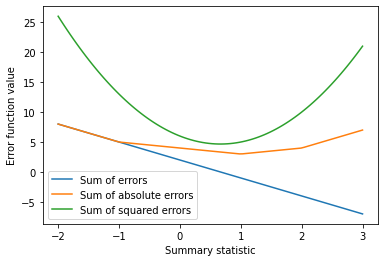

In [13]:
# Plotting different types of error functions. An experiment
import numpy as np
import matplotlib.pyplot as plt

x=np.linspace(-2,3,100)
sum_errors=(-1-x) + (1-x) + (2-x)
sum_abs_errors=np.abs(-1-x) + np.abs(1-x) + np.abs(2-x)
sum_square_errors=(-1-x)**2 + (1-x)**2 + (2-x)**2

plt.plot(x, sum_errors, label="Sum of errors")
plt.plot(x, sum_abs_errors, label="Sum of absolute errors")
plt.plot(x, sum_square_errors, label="Sum of squared errors")

plt.xlabel("Summary statistic")
plt.ylabel("Error function value")
plt.legend();


<span style="color:red">JMS: Working here</span>


**Put this in a definition block**
The average is the value that minimizes the total squared error to the data.**


Both Pandas and Numpy provide methods to calculate the average:




In [85]:
import numpy as np
import pandas as pd
df=pd.read_csv(
 "http://wireless.ece.ufl.edu/jshea/idse/data/firearms-combined.csv")
rate2005=np.array(df["RATE-2005"])
rate2014=np.array(df["RATE-2014"])

In [11]:
df["RATE-2005"].mean()

10.81

In [12]:
df["RATE-2014"].mean()

11.440000000000003

In [13]:
rate2005.mean()

10.809999999999997

In [14]:
np.mean(rate2014)

11.44

The sample mean of the 2014 data set is larger than that for the 2005 data set. This may indicate that the overturn of the assault weapon ban in 2014 is associated with an increase in firearms mortality.

However, the difference is relatively small, as are the sample sizes (50).

In [15]:
diff=rate2014.mean()-rate2005.mean()
diff

0.6300000000000026